### Лабораторна робота №3, Обробка та аналіз текстових даних на Python, Варіант 14
**Виконав**: студент групи ІП-11, Лошак Віктор Іванович<br>
**Перевірив**: Юлія Тимофєєва Сергіївна<br>

**Тема роботи**: Моделі текстових даних<br>
**Мета роботи**: Ознайомитись  з  основними  текстовими  моделями  та  їх створення за допомогою бібліотек scikit-learn та genism.

16.03.2024

**Постановка задачі**:<br>
Зчитати файл doc14. Вважати кожен рядок окремим документом корпусу. Виконати попередню обробку корпусу.
1) Представити корпус як модель «Сумка слів». Вивести вектор для слова juice.
2) Представити корпус як модель TF-IDF. Спробувати кластеризувати документи за допомогою ієрархічної агломераційної кластеризації.
3) Представити корпус як модель FastText. Знайти подібні слова до слів fruit, chancellor.<br>

**Task**:<br>
Read file doc14. Consider each line as a separate document of the corpus. Carry out preliminary processing of the case.
1) Present the corpus as a "Bag of Words" model. Output the vector for the word juice.
2) Present the case as a TF-IDF model. Try to cluster documents using hierarchical agglomeration clustering.
3) Represent the corpus as a FastText model. Find similar words to the words fruit, chancellor.

In [26]:
with open('doc14.txt', 'r', encoding='utf-8') as file:
    documents = file.readlines()
    
documents

['Fruit juice, in particular, is a highly concentrated source of fruit sugar.\n',
 'Fruits and vegetables are “juicy foods” that consist mostly of water.\n',
 "The government says the lord chancellor would be unlikely to go against Lord Woolf's wishes.\n",
 'Vegetables are naturally lower in sugar than fruit, which means freshly made vegetable juice is lower in calories than fruit juice.\n',
 'Lord Woolf said the current rules were not written down but it was inconceivable in practice that the lord chancellor would overrule his concerns.\n',
 'If you are going to drink juice, look for 100 percent juice.']

#### Task 1:
Preprocess the documents: Tokenize, remove punctuation, and lowercase. This will be automatically handled by CountVectorizer to some extent

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import io

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Get the feature names to find the index of 'juice'
features = vectorizer.get_feature_names_out()
juice_index = features.tolist().index('juice')
juice_vector = X[:, juice_index].toarray()
juice_vector

array([[1],
       [0],
       [0],
       [2],
       [0],
       [2]], dtype=int64)

#### Task 2:
Term Frequency-Inverse Document Frequency

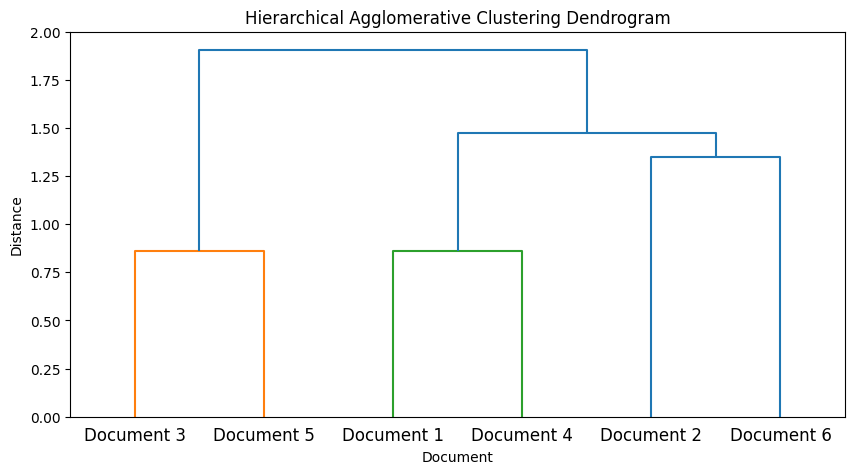

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
similarity_matrix = cosine_similarity(X_tfidf)
Z = linkage(similarity_matrix, 'ward')

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Document')
plt.ylabel('Distance')
dendrogram(Z, labels=[f'Document {i+1}' for i in range(len(documents))])
plt.show()


Оскільки в завданні лабораторної нічого не сказано про те що корпуси повинні бути лемізовані, ми використовуємо просту токенізацію на основі слів на етапі preprocessing. 

In [27]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Preprocess and tokenize the documents for FastText
filtered_docs = [[word.lower() for word in doc.split(' ') if word.lower() not in stopwords.words('english') and word.isalnum()] for doc in documents ]
tokenized_documents = [word_tokenize(" ".join(doc)) for doc in filtered_docs]
tokenized_documents[0]


['fruit', 'highly', 'concentrated', 'source', 'fruit']

In [25]:

# Initialize and train the FastText model
fasttext_model = FastText(vector_size=100, window=5, min_count=1)
fasttext_model.build_vocab(corpus_iterable=tokenized_documents)
fasttext_model.train(corpus_iterable=tokenized_documents, total_examples=len(tokenized_documents), epochs=10)

# Find similar words to 'fruit' and 'chancellor'
similar_to_fruit = fasttext_model.wv.most_similar('fruit', topn=5)
similar_to_chancellor = fasttext_model.wv.most_similar('chancellor', topn=5)

similar_to_fruit, similar_to_chancellor


([('fruits', 0.6521599292755127),
  ('vegetables', 0.19277454912662506),
  ('would', 0.1823713779449463),
  ('rules', 0.179280623793602),
  ('vegetable', 0.16435931622982025)],
 [('unlikely', 0.2521481513977051),
  ('consist', 0.2121196985244751),
  ('calories', 0.17138417065143585),
  ('rules', 0.16312173008918762),
  ('source', 0.139206662774086)])

Як видно з результатів, слова такі як fruits -- множина fruit та vegetables -- аналог fruit за змістом , розташовані ближче до fruit у відповідному embedding space.

### Висновок:
В ході виконання даної лабораторної роботи я ознайомився з основними методами обробки та аналізу текстових даних в Python, використовуючи бібліотеки scikit-learn та gensim. Було розглянуто три ключові моделі представлення текстових даних: модель «Сумка слів», TF-IDF та FastText, кожна з яких має свої особливості та сфери застосування.

Завдання лабораторної роботи включало не тільки побудову моделей, але й розуміння принципів їх роботи та аналіз отриманих результатів. Хоча в процесі виконання роботи не було застосовано лематизацію текстів перед тренуванням моделі FastText, це рішення було зумовлено специфікою завдань та особливостями моделі, що вміє ефективно працювати з різними формами слів. 

Таким чином, виконання лабораторної роботи не тільки сприяло кращому розумінню різних підходів до обробки текстових даних, але й дало важливі практичні навички для їх застосування у майбутніх проектах.